# **Métodos de análise**

- Method chaining (encadeamento de métodos)
  - `.assign()`
  - `.pipe()`
- `for` vs *List comprehension*
- `.apply(axis=0)`
- Barra de progresso usando `tqdm`
- Pandas Profiling para exploração dos dados e para garantir a qualidade dos dados
- Mostrar o dataframe usando o `style`.
- Copiar e colar no Excel `.to_clipboard()`
- Funções de janela móvel (*window functions*)

## 1 - Method chaining (encadeamento de métodos)


In [151]:
# importando biliotecas

import pandas as pd
import numpy as np
import os

### <span style='color:blue'> Tabela NBA janeiro de 2021
</span>

In [153]:
# Carregando os dados a partir do site
results = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_games-january.html')[0]
results.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
0,"Fri, Jan 1, 2021",7:00p,Memphis Grizzlies,108,Charlotte Hornets,93,Box Score,NaN,0,2:04,Spectrum Center,NaN
1,"Fri, Jan 1, 2021",7:00p,Miami Heat,83,Dallas Mavericks,93,Box Score,NaN,0,2:12,American Airlines Center,NaN
2,"Fri, Jan 1, 2021",7:00p,Boston Celtics,93,Detroit Pistons,96,Box Score,NaN,0,2:04,Little Caesars Arena,NaN
3,"Fri, Jan 1, 2021",7:30p,Atlanta Hawks,114,Brooklyn Nets,96,Box Score,NaN,0,2:00,Barclays Center,NaN
4,"Fri, Jan 1, 2021",8:00p,Chicago Bulls,96,Milwaukee Bucks,126,Box Score,NaN,0,2:09,Fiserv Forum,NaN


In [154]:
# Salvando as informações (dataframe) em csv para futuras análises
os.makedirs('./input', exist_ok=True)
path = 'input/nba_2021.csv'

results.to_csv(path)

In [155]:
results.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
0,"Fri, Jan 1, 2021",7:00p,Memphis Grizzlies,108,Charlotte Hornets,93,Box Score,NaN,0,2:04,Spectrum Center,NaN
1,"Fri, Jan 1, 2021",7:00p,Miami Heat,83,Dallas Mavericks,93,Box Score,NaN,0,2:12,American Airlines Center,NaN
2,"Fri, Jan 1, 2021",7:00p,Boston Celtics,93,Detroit Pistons,96,Box Score,NaN,0,2:04,Little Caesars Arena,NaN
3,"Fri, Jan 1, 2021",7:30p,Atlanta Hawks,114,Brooklyn Nets,96,Box Score,NaN,0,2:00,Barclays Center,NaN
4,"Fri, Jan 1, 2021",8:00p,Chicago Bulls,96,Milwaukee Bucks,126,Box Score,NaN,0,2:09,Fiserv Forum,NaN


In [156]:
# Renomeando as colunas
colunas = {
    'Date': 'data',
    'Start (ET)': 'horario',
    'Visitor/Neutral': 'time_visitante',
    'PTS' : 'pts_visit',
    'Home/Neutral':'time_casa',
    'PTS.1': 'pts_casa',
    'Unnamed: 6': 'a',
    'Unnamed: 7': 'b',
    'Attend.': 'publico',
    'LOG': 'duracao_jogo',
    'Arena': 'local',
    'Notes': 'anot'
}

results_renamed = results.rename(columns=colunas)

In [157]:
results_renamed

,data,horario,time_visitante,pts_visit,time_casa,pts_casa,a,b,publico,duracao_jogo,local,anot
0,"Fri, Jan 1, 2021",7:00p,Memphis Grizzlies,108,Charlotte Hornets,93,Box Score,NaN,0,2:04,Spectrum Center,NaN
1,"Fri, Jan 1, 2021",7:00p,Miami Heat,83,Dallas Mavericks,93,Box Score,NaN,0,2:12,American Airlines Center,NaN
2,"Fri, Jan 1, 2021",7:00p,Boston Celtics,93,Detroit Pistons,96,Box Score,NaN,0,2:04,Little Caesars Arena,NaN
3,"Fri, Jan 1, 2021",7:30p,Atlanta Hawks,114,Brooklyn Nets,96,Box Score,NaN,0,2:00,Barclays Center,NaN
4,"Fri, Jan 1, 2021",8:00p,Chicago Bulls,96,Milwaukee Bucks,126,Box Score,NaN,0,2:09,Fiserv Forum,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217,"Sun, Jan 31, 2021",3:30p,Utah Jazz,117,Denver Nuggets,128,Box Score,NaN,0,2:18,Ball Arena,NaN
218,"Sun, Jan 31, 2021",7:00p,Philadelphia 76ers,119,Indiana Pacers,110,Box Score,NaN,0,2:19,Bankers Life Fieldhouse,NaN
219,"Sun, Jan 31, 2021",7:00p,Orlando Magic,102,Toronto Raptors,115,Box Score,NaN,0,2:14,Amalie Arena,NaN
220,"Sun, Jan 31, 2021",7:00p,Brooklyn Nets,146,Washington Wizards,149,Box Score,NaN,0,2:23,Capital One Arena,NaN


In [158]:
# Modificando o formato da coluna data --> datetime

results_renamed['data'] = pd.to_datetime(results_renamed.data)
results_renamed

,data,horario,time_visitante,pts_visit,time_casa,pts_casa,a,b,publico,duracao_jogo,local,anot
0,2021-01-01,7:00p,Memphis Grizzlies,108,Charlotte Hornets,93,Box Score,NaN,0,2:04,Spectrum Center,NaN
1,2021-01-01,7:00p,Miami Heat,83,Dallas Mavericks,93,Box Score,NaN,0,2:12,American Airlines Center,NaN
2,2021-01-01,7:00p,Boston Celtics,93,Detroit Pistons,96,Box Score,NaN,0,2:04,Little Caesars Arena,NaN
3,2021-01-01,7:30p,Atlanta Hawks,114,Brooklyn Nets,96,Box Score,NaN,0,2:00,Barclays Center,NaN
4,2021-01-01,8:00p,Chicago Bulls,96,Milwaukee Bucks,126,Box Score,NaN,0,2:09,Fiserv Forum,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217,2021-01-31,3:30p,Utah Jazz,117,Denver Nuggets,128,Box Score,NaN,0,2:18,Ball Arena,NaN
218,2021-01-31,7:00p,Philadelphia 76ers,119,Indiana Pacers,110,Box Score,NaN,0,2:19,Bankers Life Fieldhouse,NaN
219,2021-01-31,7:00p,Orlando Magic,102,Toronto Raptors,115,Box Score,NaN,0,2:14,Amalie Arena,NaN
220,2021-01-31,7:00p,Brooklyn Nets,146,Washington Wizards,149,Box Score,NaN,0,2:23,Capital One Arena,NaN


In [159]:
# Verificando os dados
results_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            222 non-null    datetime64[ns]
 1   horario         222 non-null    object        
 2   time_visitante  222 non-null    object        
 3   pts_visit       222 non-null    int64         
 4   time_casa       222 non-null    object        
 5   pts_casa        222 non-null    int64         
 6   a               222 non-null    object        
 7   b               12 non-null     object        
 8   publico         222 non-null    int64         
 9   duracao_jogo    222 non-null    object        
 10  local           222 non-null    object        
 11  anot            0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 20.9+ KB


In [160]:
# Definindo a data como índice em um novo dataframe

results_renamed_data = results_renamed.set_index('data')
results_renamed_data

,horario,time_visitante,pts_visit,time_casa,pts_casa,a,b,publico,duracao_jogo,local,anot
data,,,,,,,,,,,
2021-01-01,7:00p,Memphis Grizzlies,108,Charlotte Hornets,93,Box Score,NaN,0,2:04,Spectrum Center,NaN
2021-01-01,7:00p,Miami Heat,83,Dallas Mavericks,93,Box Score,NaN,0,2:12,American Airlines Center,NaN
2021-01-01,7:00p,Boston Celtics,93,Detroit Pistons,96,Box Score,NaN,0,2:04,Little Caesars Arena,NaN
2021-01-01,7:30p,Atlanta Hawks,114,Brooklyn Nets,96,Box Score,NaN,0,2:00,Barclays Center,NaN
2021-01-01,8:00p,Chicago Bulls,96,Milwaukee Bucks,126,Box Score,NaN,0,2:09,Fiserv Forum,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31,3:30p,Utah Jazz,117,Denver Nuggets,128,Box Score,NaN,0,2:18,Ball Arena,NaN
2021-01-31,7:00p,Philadelphia 76ers,119,Indiana Pacers,110,Box Score,NaN,0,2:19,Bankers Life Fieldhouse,NaN
2021-01-31,7:00p,Orlando Magic,102,Toronto Raptors,115,Box Score,NaN,0,2:14,Amalie Arena,NaN


In [161]:
# Removendo colunas desnecessárias 
results_renamed_data_cols = results_renamed_data.drop(['horario', 'a','b','publico','anot','duracao_jogo', 'local'], axis=1)
results_renamed_data_cols

,time_visitante,pts_visit,time_casa,pts_casa
data,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93
2021-01-01,Miami Heat,83,Dallas Mavericks,93
2021-01-01,Boston Celtics,93,Detroit Pistons,96
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126
...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110
2021-01-31,Orlando Magic,102,Toronto Raptors,115


In [162]:
# Adicionando uma coluna com o total de pontos
results_renamed_data_cols['total_pts'] = (results_renamed_data_cols['pts_visit'] + 
                                         results_renamed_data_cols['pts_casa'])
results_renamed_data_cols

,time_visitante,pts_visit,time_casa,pts_casa,total_pts
data,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222
...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,245
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,229
2021-01-31,Orlando Magic,102,Toronto Raptors,115,217


In [163]:
# Definindo uma função para determinar o time ganhador

def det_vencedor(df):
    if df['pts_visit'] < df['pts_casa']:
        df['ganhador'] = 'casa'
    else:
        df['ganhador'] = 'visitante'
    return df

# como não há empate, essa comparação é suficiente

In [164]:
# Utilizando o .apply para aplicar a função linha a linha

results_renamed_data_cols = results_renamed_data_cols.apply(det_vencedor, axis=1)
results_renamed_data_cols

,time_visitante,pts_visit,time_casa,pts_casa,total_pts,ganhador
data,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176,casa
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189,casa
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210,visitante
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222,casa
...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,245,casa
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,229,visitante
2021-01-31,Orlando Magic,102,Toronto Raptors,115,217,casa


In [165]:
# Determinando o pencentual de jogos que o time da casa (ou visitante) venceu

print(results_renamed_data_cols.ganhador.value_counts())
print('---------------------------------')

# Temos a porcentagem
print(results_renamed_data_cols.ganhador.value_counts(normalize=True))
print('---------------------------------')

# No formato de dataframe
results_renamed_data_cols.ganhador.value_counts(normalize=True).to_frame()

ganhador
casa         118
visitante    104
Name: count, dtype: int64
---------------------------------
ganhador
casa         0.531532
visitante    0.468468
Name: proportion, dtype: float64
---------------------------------


,proportion
ganhador,
casa,0.531532
visitante,0.468468


###  1.2 - Method chaining (encadeamento de métodos) - parte II

- Compreender a organização e otimização do código
- Identificação de erros na carga de dados
- Redução do uso de variáveis intermediárias

In [167]:
# Sumarizando todo o código anterior

# Carregando bibliotecas
import pandas as pd
import os

# Main function
# Função para determinar o time ganhador
def det_vencedor(df):
    if df['pts_visit'] < df['pts_casa']:
        df['ganhador'] = 'casa'
    else:
        df['ganhador'] = 'visitante'
    return df

# Carregando os dados a partir do site
results = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_games-january.html')[0]
results.head()
# Salvando as informações (dataframe) em csv para futuras análises
os.makedirs('./input', exist_ok=True)
path = 'input/nba_2021.csv'
results.to_csv(path)

# Renomeando as colunas
colunas = {
    'Date': 'data',
    'Start (ET)': 'horario',
    'Visitor/Neutral': 'time_visitante',
    'PTS' : 'pts_visit',
    'Home/Neutral':'time_casa',
    'PTS.1': 'pts_casa',
    'Unnamed: 6': 'a',
    'Unnamed: 7': 'b',
    'Attend.': 'publico',
    'LOG': 'duracao_jogo',
    'Arena': 'local',
    'Notes': 'anot'
}
results_renamed = results.rename(columns=colunas)
# Modificando o formato da coluna data --> datetime
results_renamed['data'] = pd.to_datetime(results_renamed.data)
# Definindo a data como índice em um novo dataframe
results_renamed_data = results_renamed.set_index('data')
# Removendo colunas desnecessárias 
results_renamed_data_cols = results_renamed_data.drop(['horario', 'a','b','publico','anot','duracao_jogo', 'local'], axis=1)
# Adicionando uma coluna com o total de pontos
results_renamed_data_cols['total_pts'] = (results_renamed_data_cols['pts_visit'] + 
                                         results_renamed_data_cols['pts_casa'])
# Utilizando o .apply para aplicar a função linha a linha
results_renamed_data_cols = results_renamed_data_cols.apply(det_vencedor, axis=1)
# Aplicando função linha a linha do dataframe
print(results_renamed_data_cols.ganhador.value_counts(normalize=True))

results_renamed_data_cols

ganhador
casa         0.531532
visitante    0.468468
Name: proportion, dtype: float64


,time_visitante,pts_visit,time_casa,pts_casa,total_pts,ganhador
data,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176,casa
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189,casa
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210,visitante
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222,casa
...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,245,casa
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,229,visitante
2021-01-31,Orlando Magic,102,Toronto Raptors,115,217,casa


###  1.3 - Method chaining (encadeamento de métodos) - parte III

Um encadeamento de métodos nada mais é do multiplos métodos aplicados sequencialmente, como em 
``` python 
df.reset_index().drop().plot()
``` 

### <span style='color:blue'> Assign
</span>

`.assign()` faz a mesma coisa que o `=`, ou seja, 
```python
df['var']=pd.to_datetime(df['var'])
```
é a mesma coisa que 
```python
df.assign(var = lambda x: pd.to_datetime(x.var))
```

Utilizando `assign()` é possível criar novas variáveis dentro de um encadeamento de métodos.

In [172]:
# Forma usual
results_renamed_data_cols['total_pts'] = (results_renamed_data_cols['pts_visit'] 
                                        + results_renamed_data_cols['pts_casa'])
results_renamed_data_cols

,time_visitante,pts_visit,time_casa,pts_casa,total_pts,ganhador
data,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176,casa
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189,casa
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210,visitante
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222,casa
...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,245,casa
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,229,visitante
2021-01-31,Orlando Magic,102,Toronto Raptors,115,217,casa


In [173]:
# Utilizando o assign

results_renamed_data_cols.assign(total_2 = lambda p : p['pts_visit'] + p['pts_casa'])

,time_visitante,pts_visit,time_casa,pts_casa,total_pts,ganhador,total_2
data,,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201,visitante,201
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176,casa,176
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189,casa,189
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210,visitante,210
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222,casa,222
...,...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,245,casa,245
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,229,visitante,229
2021-01-31,Orlando Magic,102,Toronto Raptors,115,217,casa,217


### <span style='color:blue'> Pipe </span>

É possível realizar muitas tarefas com as funções internas do Pandas/Python, mas as vezes precisamos usar alguma função criada por nós mesmos, é para isso serve o `.pipe()` ele tem uma funcionalidade parecida com `%>%` (leia-se pipe) do `R`. Em que o resultado da função a esquerda entra como primeiro parâmetro da função a direita.

##### Em R
``` R

sqrt(sum(x)) -->

x %>% sum() %>% sqrt()

```

##### Receita de bolo sem pipe. Tente entender o que é preciso fazer.

``` R

esfrie(
  asse(
    coloque(
      bata(
        acrescente(
          recipiente(
            rep("farinha", 2), 
            "água", 
            "fermento", 
            "leite", 
            "óleo"
          ), 
          "farinha", 
          ate = "macio"
        ), 
        duracao = "3min"
      ), 
      lugar = "forma", 
      tipo = "grande", 
      untada = TRUE
    ), 
    duracao = "50min"
  ), 
  lugar = "geladeira", 
  duracao = "20min"
)

```

##### Veja como o código acima pode ser reescrito utilizando-se o pipe. Agora realmente se parece com uma receita de bolo.


``` R
recipiente(rep("farinha", 2), "água", "fermento", "leite", "óleo") %>%
  acrescente("farinha", ate = "macio") %>%
  bata(duracao = "3min") %>%
  coloque(lugar = "forma", tipo = "grande", untada = TRUE) %>%
  asse(duracao = "50min") %>%
  esfrie(lugar = "geladeira", duracao = "20min")

```

trecho extraído do livro [curso-r](https://livro.curso-r.com/6-1-o-operador-pipe.html)

In [177]:
# Retomando ao dataframe

results_renamed_data_cols.head(2)

,time_visitante,pts_visit,time_casa,pts_casa,total_pts,ganhador
data,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176,casa


In [178]:
# Eliminando ao última coluna para reconstruí-la com .apply() e pipe()
results_renamed_data_cols.drop('ganhador', axis=1, inplace=True)
results_renamed_data_cols

,time_visitante,pts_visit,time_casa,pts_casa,total_pts
data,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222
...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,245
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,229
2021-01-31,Orlando Magic,102,Toronto Raptors,115,217


In [179]:
# Por meio do apply()

results_renamed_data_cols_apply = results_renamed_data_cols.apply(det_vencedor, axis=1)
results_renamed_data_cols_apply

,time_visitante,pts_visit,time_casa,pts_casa,total_pts,ganhador
data,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176,casa
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189,casa
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210,visitante
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222,casa
...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,245,casa
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,229,visitante
2021-01-31,Orlando Magic,102,Toronto Raptors,115,217,casa


##### Nota relevante sobre as funções

Para utilizar funções dentro do `.pipe()`, estando relacionadas a DataFrames, é necessário que as funções sejam vetorizadas e não funções escalares como é o caso em
```python
def det_vencedor(df):
    if df['pts_visit'] < df['pts_casa']:
        df['ganhador'] = 'casa'
    else:
        df['ganhador'] = 'visitante'
    return df
```
onde dois valores são comparados de cada vez. Sendo assim, não pode ser diretamente aplicada a uma série inteira.

Uma função do tipo
```python
def det_vencedor(df):
    df['ganhador'] = np.where(df['pts_visit'] < df['pts_casa'], 'casa', 'visitante')
```
em que `np.where()` é uma função vetorizada no NumPy, é capaz de operar em uma série inteira de uma só vez. Isso torna o `np.where()` muito mais eficiente em operações com DataFrames grandes.

(`Pandas` não suporta declaração `if-else` diretamente em uma série. A segunda função usa uma operação vetorizada que o pandas suporta diretamente, por isso funciona com o pipe) 

In [181]:
results_renamed_data_cols.head(2)

,time_visitante,pts_visit,time_casa,pts_casa,total_pts
data,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176


In [182]:
# Determinando a função para uso no pipe()
def det_winner(df):
    df['ganhador'] = np.where(df['pts_visit'] < df['pts_casa'], 'casa', 'visitante')

In [183]:
# Utilizando o .pipe()

results_renamed_data_cols.pipe(det_winner)
# o pipe altera diretamente no dataframe

In [184]:
results_renamed_data_cols.head()

,time_visitante,pts_visit,time_casa,pts_casa,total_pts,ganhador
data,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176,casa
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189,casa
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210,visitante
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222,casa


##### Reescrevendo a célula completa (da parte II) utilizando o encadeamento de métodos

In [186]:
# Carregando bibliotecas
import pandas as pd
import os

# Função para determinar o time ganhador
def det_winner(df):
    df['ganhador'] = np.where(df['pts_visit'] < df['pts_casa'], 'casa', 'visitante')

# Carregando os dados a partir do site
results = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_games-january.html')[0]
results.head()

# Salvando as informações (dataframe) em csv para futuras análises
os.makedirs('./input', exist_ok=True)
path = 'input/nba_2021.csv'
results.to_csv(path)

# Renomeando as colunas
colunas = {
    'Date': 'data',
    'Start (ET)': 'horario',
    'Visitor/Neutral': 'time_visitante',
    'PTS' : 'pts_visit',
    'Home/Neutral':'time_casa',
    'PTS.1': 'pts_casa',
    'Unnamed: 6': 'a',
    'Unnamed: 7': 'b',
    'Attend.': 'publico',
    'LOG': 'duracao_jogo',
    'Arena': 'local',
    'Notes': 'anot'
}



In [187]:
results.head(2)

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
0,"Fri, Jan 1, 2021",7:00p,Memphis Grizzlies,108,Charlotte Hornets,93,Box Score,NaN,0,2:04,Spectrum Center,NaN
1,"Fri, Jan 1, 2021",7:00p,Miami Heat,83,Dallas Mavericks,93,Box Score,NaN,0,2:12,American Airlines Center,NaN


In [188]:
results_2 = (results.rename(columns = colunas)
        .assign(data = lambda x : pd.to_datetime(x.data)) # não se utiliza "" no assign
        .set_index('data')
        .drop(['horario', 'a','b','publico','anot','duracao_jogo', 'local'], axis=1)
        .assign(total_pts = lambda x : x['pts_visit'] + x['pts_casa'])
        # .pipe(det_winner) # Why it doesn't work?
)
results_2.pipe(det_winner)
results_2

,time_visitante,pts_visit,time_casa,pts_casa,total_pts,ganhador
data,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,176,casa
2021-01-01,Boston Celtics,93,Detroit Pistons,96,189,casa
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,210,visitante
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,222,casa
...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,245,casa
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,229,visitante
2021-01-31,Orlando Magic,102,Toronto Raptors,115,217,casa


## 2 - For vs List comprehension

In [190]:
import pandas as pd

In [191]:
# Criando um dataframe
df_1 = pd.DataFrame({
    'A': np.arange(10, 101, 10),
    'B': np.arange(1, 11, 1)
})

In [192]:
df_1

,A,B
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
5,60,6
6,70,7
7,80,8
8,90,9
9,100,10


In [193]:
df_1['A'] + df_1['B']

0     11
1     22
2     33
3     44
4     55
5     66
6     77
7     88
8     99
9    110
dtype: int32

##### Usando o `for`

In [195]:
for a in df_1['A']:
    print(a)

10
20
30
40
50
60
70
80
90
100


##### Usando *list comprehension*
```python
[expression for item in list]
```

In [197]:
[item for item in df_1['A']]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [198]:
[print(item) for item in df_1['A']]

10
20
30
40
50
60
70
80
90
100


[None, None, None, None, None, None, None, None, None, None]

In [199]:
# Relembrando do zip

print(zip(df_1['A'], df_1['B']))
list(zip(df_1['A'], df_1['B']))

[(10, 1),
 (20, 2),
 (30, 3),
 (40, 4),
 (50, 5),
 (60, 6),
 (70, 7),
 (80, 8),
 (90, 9),
 (100, 10)]

##### Utilizando `for` e `zip`

In [201]:
for a, b in zip(df_1['A'], df_1['B']):
    print(a,b)

10 1
20 2
30 3
40 4
50 5
60 6
70 7
80 8
90 9
100 10


##### Usando *list comprehension* e `zip`


In [203]:
[(a,b) for a,b in zip(df_1['A'], df_1['B'])]

[(10, 1),
 (20, 2),
 (30, 3),
 (40, 4),
 (50, 5),
 (60, 6),
 (70, 7),
 (80, 8),
 (90, 9),
 (100, 10)]

In [204]:
[print(a,b) for a,b in zip(df_1['A'], df_1['B'])]

10 1
20 2
30 3
40 4
50 5
60 6
70 7
80 8
90 9
100 10


[None, None, None, None, None, None, None, None, None, None]

##### Usando `for`, `zip` e `if`

Somando somente quando os valores de b forem pares.

In [206]:
for a, b in zip(df_1['A'], df_1['B']):
    if b % 2 == 0: # Resto inteiro da divisão igual a zero
        print(a+b)

22
44
66
88
110


##### Usando *list comprehension*  `zip` e `if`

Somando somente quando os valores de b forem pares.

In [208]:
[(a+b) for a,b in zip(df_1['A'], df_1['B']) if b % 2 == 0]

[22, 44, 66, 88, 110]

In [209]:
[print(a+b) for a,b in zip(df_1['A'], df_1['B']) if b % 2 == 0]

22
44
66
88
110


[None, None, None, None, None]

##### Usando `for` e `zip` e `if-else`

Somando somente quando os valores de `b` forem pares, caso contrário 0.

In [211]:
for a,b in zip(df_1['A'], df_1['B']):
    if b % 2 == 0:
        print(a + b)
    else:
        print(0)

0
22
0
44
0
66
0
88
0
110


##### Usando *list comprehension* e `zip` e `if-else`

Somando somente quando os valores de `b` forem pares, caso contrário 0.
```python
[expression if condition else expression2 for item in list]
```

In [213]:
[(a + b) if b % 2 == 0 else 0 for a,b in zip(df_1['A'], df_1['B'])]

[0, 22, 0, 44, 0, 66, 0, 88, 0, 110]

In [214]:
[print(a + b) if b % 2 == 0 else print(0) for a,b in zip(df_1['A'], df_1['B'])]

0
22
0
44
0
66
0
88
0
110


[None, None, None, None, None, None, None, None, None, None]

In [215]:
df_1

,A,B
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
5,60,6
6,70,7
7,80,8
8,90,9
9,100,10


In [216]:
# Se par, adicionando ao dataframe

df_1['Soma_se_par'] = [(a+b) if b % 2 == 0 else 0 for a,b in zip(df_1['A'], df_1['B'])]
df_1

,A,B,Soma_se_par
0,10,1,0
1,20,2,22
2,30,3,0
3,40,4,44
4,50,5,0
5,60,6,66
6,70,7,0
7,80,8,88
8,90,9,0
9,100,10,110


In [217]:
# se ímpar, adicionando ao dataframe

df_1['soma_se_impar'] = [(a+b) if b % 2 != 0 else 0 for a,b in zip(df_1['A'], df_1['B'])]
df_1

,A,B,Soma_se_par,soma_se_impar
0,10,1,0,11
1,20,2,22,0
2,30,3,0,33
3,40,4,44,0
4,50,5,0,55
5,60,6,66,0
6,70,7,0,77
7,80,8,88,0
8,90,9,0,99
9,100,10,110,0


## 3 - Utilizando o método `.apply()`

##### Método do Pandas (.apply())

In [220]:
import pandas as pd
import numpy as np

In [221]:
df = pd.DataFrame({
    'A': np.arange(10, 101, 10),
    'B': np.arange(1, 11, 1)
})
df

,A,B
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
5,60,6
6,70,7
7,80,8
8,90,9
9,100,10


In [222]:
# Usando .apply e lambda (função anônima)

df.apply(lambda x : print(x), axis=0)

0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
Name: A, dtype: int32
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: B, dtype: int32


A    None
B    None
dtype: object

In [223]:
df.apply(lambda x: print(x), axis=1)

A    10
B     1
Name: 0, dtype: int32
A    20
B     2
Name: 1, dtype: int32
A    30
B     3
Name: 2, dtype: int32
A    40
B     4
Name: 3, dtype: int32
A    50
B     5
Name: 4, dtype: int32
A    60
B     6
Name: 5, dtype: int32
A    70
B     7
Name: 6, dtype: int32
A    80
B     8
Name: 7, dtype: int32
A    90
B     9
Name: 8, dtype: int32
A    100
B     10
Name: 9, dtype: int32


0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
dtype: object

In [224]:
# Somando os elementos

df.apply(lambda x: x['A'] + x['B'], axis=1)

0     11
1     22
2     33
3     44
4     55
5     66
6     77
7     88
8     99
9    110
dtype: int32

In [225]:
df['B'] % 2 == 0

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
Name: B, dtype: bool

##### Usando `.apply()` com `lambda` e `if-else`

In [227]:
df.apply(lambda x : x['A'] + x['B'] if x['B'] % 2 == 0 else 0, axis=1)

0      0
1     22
2      0
3     44
4      0
5     66
6      0
7     88
8      0
9    110
dtype: int64

##### Usando `.apply()` para função definidas pelo usuário (udf - user defined function)

In [229]:
def soma_par(df):
    if df['B'] % 2 == 0:
        return df['A'] + df['B']
    else:
        return 0

In [230]:
# Aplicando no dataframe
df.apply(soma_par, axis=1)

0      0
1     22
2      0
3     44
4      0
5     66
6      0
7     88
8      0
9    110
dtype: int64

In [231]:
def soma_impar(df):
    if df['B'] % 2 != 0:
        return df['A'] + df['B']
    else:
        return 0

In [232]:
df.apply(soma_impar, axis=1)

0    11
1     0
2    33
3     0
4    55
5     0
6    77
7     0
8    99
9     0
dtype: int64

##### Comparando a performance das *lists comprehension* com o `.apply()`

`%timeit` -- para comparar a execução (tempo de execução)

In [234]:
%timeit [(a+b) if b % 2 == 0 else 0 for a,b in zip(df['A'], df['B'])]

%timeit df.apply(soma_par, axis=1)

12.2 μs ± 463 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
328 μs ± 17.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


##### Criando um dataframe maior e testando a performance

In [236]:
df_bigger = pd.concat([df]*5000, ignore_index=True)
df_bigger

,A,B
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
...,...,...
49995,60,6
49996,70,7
49997,80,8
49998,90,9


In [237]:
# Verificando a performance

# List conprehension possui uma melhor performance
%timeit [(a+b) if b % 2 == 0 else 0 for a,b in zip(df_bigger['A'],df_bigger['B'])]

%timeit df_bigger.apply(soma_par, axis=1)

14.4 ms ± 388 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
620 ms ± 42.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Priorizar o uso de *list comprehension*, quando possível, pois sua performance é superior.

##### Mais um exemplo

In [240]:
df['B']**2 + df['A']

0     11
1     24
2     39
3     56
4     75
5     96
6    119
7    144
8    171
9    200
dtype: int32

In [241]:
df.apply(lambda x : x['B']**2 + x['A'], axis=1)

0     11
1     24
2     39
3     56
4     75
5     96
6    119
7    144
8    171
9    200
dtype: int32

In [242]:
# Verificando a performance

%timeit df['B']**2 + df['A']

%timeit df.apply(lambda x : x['B']**2 + x['A'], axis=1)

141 μs ± 5.84 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
355 μs ± 23.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 4 - Método `.apply(axis=0)`

- Diferença entre `axis=0` e `axis=1` no Pandas
- Transformação de data de string para tempo

In [244]:
import pandas as pd
import numpy as np

In [245]:
# Carregando base de dados NBA
results = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_games-january.html')[0]

# Renomeando as colunas
colunas = {
    'Date': 'data',
    'Start (ET)': 'horario',
    'Visitor/Neutral': 'time_visitante',
    'PTS' : 'pts_visit',
    'Home/Neutral':'time_casa',
    'PTS.1': 'pts_casa',
    'Unnamed: 6': 'a',
    'Unnamed: 7': 'b',
    'Attend.': 'publico',
    'LOG': 'duracao_jogo',
    'Arena': 'local',
    'Notes': 'anot'
}

results = results.rename(columns=colunas)

results['data_1'] = results['data']
results['data_2'] = results['data']
results['data_3'] = results['data']
results['data_4'] = results['data']
results['data_5'] = results['data']
results['data_6'] = results['data']

df_datas = results[['data', 'data_1', 'data_2', 'data_3', 'data_4', 'data_5', 'data_6']]

In [246]:
df_datas.head()

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
1,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
2,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
3,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
4,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"


In [247]:
df_datas.dtypes

data      object
data_1    object
data_2    object
data_3    object
data_4    object
data_5    object
data_6    object
dtype: object

**Avaliando formas para transformar as strings de data em formato "datetime".**

##### <span style='color:purple'> Utilizando o `for`
</span>

In [250]:
df_datas_for = df_datas.reset_index(drop=True)
for col in df_datas_for.columns:
    df_datas_for[col] = pd.to_datetime(df_datas_for[col])

In [251]:
print(df_datas_for.dtypes)
df_datas_for

data      datetime64[ns]
data_1    datetime64[ns]
data_2    datetime64[ns]
data_3    datetime64[ns]
data_4    datetime64[ns]
data_5    datetime64[ns]
data_6    datetime64[ns]
dtype: object


,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
217,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
218,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
219,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
220,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


In [252]:
df_datas

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
1,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
2,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
3,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
4,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
...,...,...,...,...,...,...,...
217,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
218,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
219,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
220,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"


#####  <span style='color:purple'> Utilizando o `.assign()`
</span> 


In [254]:
# Encadeamento 

df_datas_assign = (df_datas.assign(data = lambda x: pd.to_datetime(x.data))
    .assign(data_1 = lambda x : pd.to_datetime(x.data_1))
    .assign(data_2 = lambda x : pd.to_datetime(x.data_2))
    .assign(data_3 = lambda x : pd.to_datetime(x.data_3))
    .assign(data_4 = lambda x : pd.to_datetime(x.data_4))
    .assign(data_5 = lambda x : pd.to_datetime(x.data_5))
    .assign(data_6 = lambda x : pd.to_datetime(x.data_6))
)

In [255]:
print(df_datas_assign.dtypes)
df_datas_assign

data      datetime64[ns]
data_1    datetime64[ns]
data_2    datetime64[ns]
data_3    datetime64[ns]
data_4    datetime64[ns]
data_5    datetime64[ns]
data_6    datetime64[ns]
dtype: object


,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
217,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
218,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
219,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
220,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


#####  <span style='color:purple'> Utilizando o `.apply()`
</span> 

In [257]:
df_datas.head(2)

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
1,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"


In [258]:
# Aplicando o método apply
df_datas_apply_0 = df_datas.apply(lambda x: pd.to_datetime(x), axis=0)
df_datas_apply_1 = df_datas.apply(lambda x: pd.to_datetime(x), axis=1)

In [259]:
# para axis = 0
df_datas_apply_0

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
217,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
218,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
219,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
220,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


In [260]:
# para axis = 1
df_datas_apply_1

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
217,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
218,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
219,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
220,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


In [261]:
results = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_games-january.html')[0]
results

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
0,"Fri, Jan 1, 2021",7:00p,Memphis Grizzlies,108,Charlotte Hornets,93,Box Score,NaN,0,2:04,Spectrum Center,NaN
1,"Fri, Jan 1, 2021",7:00p,Miami Heat,83,Dallas Mavericks,93,Box Score,NaN,0,2:12,American Airlines Center,NaN
2,"Fri, Jan 1, 2021",7:00p,Boston Celtics,93,Detroit Pistons,96,Box Score,NaN,0,2:04,Little Caesars Arena,NaN
3,"Fri, Jan 1, 2021",7:30p,Atlanta Hawks,114,Brooklyn Nets,96,Box Score,NaN,0,2:00,Barclays Center,NaN
4,"Fri, Jan 1, 2021",8:00p,Chicago Bulls,96,Milwaukee Bucks,126,Box Score,NaN,0,2:09,Fiserv Forum,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
217,"Sun, Jan 31, 2021",3:30p,Utah Jazz,117,Denver Nuggets,128,Box Score,NaN,0,2:18,Ball Arena,NaN
218,"Sun, Jan 31, 2021",7:00p,Philadelphia 76ers,119,Indiana Pacers,110,Box Score,NaN,0,2:19,Bankers Life Fieldhouse,NaN
219,"Sun, Jan 31, 2021",7:00p,Orlando Magic,102,Toronto Raptors,115,Box Score,NaN,0,2:14,Amalie Arena,NaN
220,"Sun, Jan 31, 2021",7:00p,Brooklyn Nets,146,Washington Wizards,149,Box Score,NaN,0,2:23,Capital One Arena,NaN


#####  <span style='color:purple'> `%timeit`, avaliando
</span> 

In [263]:
%timeit df_datas_apply_0 = df_datas.apply(lambda x: pd.to_datetime(x), axis=0) # mais eficiente
%timeit df_datas_apply_1 = df_datas.apply(lambda x: pd.to_datetime(x), axis=1)

10.2 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
190 ms ± 26.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


> **Se o df tiver mais linhas utilizar `axis=0`, se possuir mais colunas `axis=1`**

In [265]:
# com somente duas linhas

%timeit df_datas.head(2).apply(lambda x: pd.to_datetime(x), axis=0)
%timeit df_datas.head(2).apply(lambda x: pd.to_datetime(x), axis=1) # mais eficiente

5.63 ms ± 874 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.51 ms ± 389 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 5 - Barra de progresso usando `tqdm`

- Biblioteca `tqdm`
- Método `progress_apply` do `tqdm` em operações de dados
- Avaliar a performance em função do parâmetro `axis`

In [267]:
# Instalando o tqdm

!pip install tqdm

In [268]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

In [269]:
# Carregando base de dados NBA
results = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_games-january.html')[0]

# Renomeando as colunas
colunas = {
    'Date': 'data',
    'Start (ET)': 'horario',
    'Visitor/Neutral': 'time_visitante',
    'PTS' : 'pts_visit',
    'Home/Neutral':'time_casa',
    'PTS.1': 'pts_casa',
    'Unnamed: 6': 'a',
    'Unnamed: 7': 'b',
    'Attend.': 'publico',
    'LOG': 'duracao_jogo',
    'Arena': 'local',
    'Notes': 'anot'
}

results = results.rename(columns=colunas)

results['data_1'] = results['data']
results['data_2'] = results['data']
results['data_3'] = results['data']
results['data_4'] = results['data']
results['data_5'] = results['data']
results['data_6'] = results['data']

df_datas = results[['data', 'data_1', 'data_2', 'data_3', 'data_4', 'data_5', 'data_6']]

In [270]:
df_datas.head()

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
1,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
2,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
3,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
4,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"


In [271]:
df_datas_maior = pd.concat([df_datas]*100, ignore_index=True)
df_datas_maior

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
1,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
2,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
3,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
4,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
...,...,...,...,...,...,...,...
22195,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
22196,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
22197,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
22198,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"


In [272]:
df_datas_maior.progress_apply(lambda x : pd.to_datetime(x), axis=1)

100%|███████████████████████████████████████████████████████████████████████████| 22200/22200 [00:22<00:00, 967.74it/s]


,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
22195,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22196,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22197,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22198,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


In [273]:
df_datas_maior.progress_apply(lambda x : pd.to_datetime(x), axis=0)


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 185.04it/s]


,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
22195,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22196,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22197,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22198,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


## 6 - Pandas Profiling para exploração dos dados


In [275]:
# !pip install pandas-profiling 
# !pip install ydata-profiling

In [116]:
import pandas as pd
import os
import ydata_profiling
from ydata_profiling import ProfileReport

# from pandas_profiling import ProfileReport

In [118]:
# Carregando dados 

df = pd.read_csv('dados.csv')
print(df.shape)
df.head()

(16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [120]:
# Aplicando o pacote ProfileReport

prof = ProfileReport(df)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [279]:
# Exportando o HTML 
# Facilita a visualização das analises no browser

os.makedirs('./output', exist_ok=True)
prof.to_file('./output/analise.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 7 - Mostrar dataframe usando style

In [281]:
# imports 
import pandas as pd
import statsmodels.api as sm

In [282]:
# Carregando dataframe

df = pd.read_csv('dados.csv')
df.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False


In [283]:
# Rodando uma regressão logística 

cols = [
    'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'possui_email'
]

# Definindo a variável dependente e independente
xtrain = df[cols]
ytrain = df[['mau']]

# Construindo o modelo e ajustando os dados
log_reg = sm.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.112400
         Iterations 8


In [284]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    mau   No. Observations:                16650
Model:                          Logit   Df Residuals:                    16645
Method:                           MLE   Df Model:                            4
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                -0.01189
Time:                        09:32:51   Log-Likelihood:                -1871.5
converged:                       True   LL-Null:                       -1849.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
qtd_filhos                0.8266      0.131      6.290      0.000       0.569       1.084
idade                    -0.0530      0.004    -14.598      0.000      -0.060      -0.046
tempo_emprego            -0.0010      0.000     -5.846      0.000      -0.001      -0.001
qt_pessoas_residencia    -0.8893      0.087    -10.271      0.000      -1.059      -0.720
possui_email             -0.3263      0.192     -1.696      0.090      -0.703       0.051
=========================================================================================
"""

In [285]:
# Obtendo apenas os coeficientes
log_reg.params

qtd_filhos               0.826553
idade                   -0.052973
tempo_emprego           -0.000953
qt_pessoas_residencia   -0.889271
possui_email            -0.326308
dtype: float64

In [286]:
# convertendo em dataframe
log_reg.params.to_frame()

,0
qtd_filhos,0.826553
idade,-0.052973
tempo_emprego,-0.000953
qt_pessoas_residencia,-0.889271
possui_email,-0.326308


##### Utilizando o **encadeamento de métodos** para definir uma range de cores

In [288]:
(
    log_reg.params.to_frame()
        .reset_index()
        .rename(columns={'index':'variable', 0:'coef'})
        # .round(decimals=2)
        .sort_values('coef', ascending=False)
        .style.bar(color=['green','lightblue'], align='zero')
)

,variable,coef
0,qtd_filhos,0.826553
2,tempo_emprego,-0.000953
1,idade,-0.052973
4,possui_email,-0.326308
3,qt_pessoas_residencia,-0.889271


In [289]:
# Realizando uma análise por randomforest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
cols =[
    'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'possui_email',
    'possui_fone', 'possui_fone_comercial'
]

rf.fit(df[cols], df['mau'])

print('Feature importances: ', rf.feature_importances_)
print('Variable: ', cols)

Feature importances:  [0.02252816 0.54068331 0.3759557  0.0293548  0.00695052 0.01257148
 0.01195603]
Variable:  ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'possui_email', 'possui_fone', 'possui_fone_comercial']


In [290]:
# Gerando uma escala de cores com método de encadeamento

(
    pd.DataFrame({'variable': cols,
                  'featimp': rf.feature_importances_})
        .round(decimals=2)
        .sort_values('featimp', ascending=False)
        .style.bar(color=['lightblue','lightgreen'], align='zero')
)

,variable,featimp
1,idade,0.540000
2,tempo_emprego,0.380000
3,qt_pessoas_residencia,0.030000
0,qtd_filhos,0.020000
4,possui_email,0.010000
5,possui_fone,0.010000
6,possui_fone_comercial,0.010000


## 8 - Copiar e colar no Excel método `.to_clipboard()`

Um método para copiar e colar em outras plataformas mantendo a organização dos dados.

In [293]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# DataFrame
df = pd.read_csv('dados.csv')

# RandomForest
rf = RandomForestClassifier()
cols =[
    'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'possui_email',
    'possui_fone', 'possui_fone_comercial'
]

rf.fit(df[cols], df['mau'])

print('Feature importances: ', rf.feature_importances_)
print('Variable: ', cols)

Feature importances:  [0.02357056 0.54235546 0.37389672 0.02832828 0.00785972 0.01257724
 0.01141202]
Variable:  ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'possui_email', 'possui_fone', 'possui_fone_comercial']


In [294]:
# Visualizando os dados

(pd.DataFrame({
    'variable': cols,
    'featimp' : rf.feature_importances_})
        .round(decimals=2)
        .sort_values('featimp', ascending=False)
)

,variable,featimp
1,idade,0.54
2,tempo_emprego,0.37
3,qt_pessoas_residencia,0.03
0,qtd_filhos,0.02
4,possui_email,0.01
5,possui_fone,0.01
6,possui_fone_comercial,0.01


In [295]:
# Salvando excel

(pd.DataFrame({
    'variable': cols,
    'featimp' : rf.feature_importances_})
        .round(decimals=2)
        .sort_values('featimp', ascending=False).to_excel('./output/test.xlsx')
)

In [296]:
# Salvando pelo clipboard

# Basicamente um "ctrl + c" do dataframe

(pd.DataFrame({
    'variable': cols,
    'featimp' : rf.feature_importances_})
        .round(decimals=2)
        .sort_values('featimp', ascending=False).to_clipboard()
)

## 9 - Funções de janela móvel (window functions)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Carregando banco de dados

sensor_data = pd.read_csv('sensor-data.csv')
print(sensor_data.info())
print('----------------------------------')
print('Shape -->', sensor_data.shape)
sensor_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88688 entries, 0 to 88687
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      88688 non-null  object 
 1   power     88688 non-null  float64
 2   temp      88688 non-null  int64  
 3   humidity  88688 non-null  int64  
 4   light     88688 non-null  int64  
 5   CO2       88688 non-null  int64  
 6   dust      88688 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 4.7+ MB
None
----------------------------------
Shape --> (88688, 7)


,time,power,temp,humidity,light,CO2,dust
0,2015-08-01 00:00:28,0.0,32,40,0,973,27.80
1,2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2,2015-08-01 00:01:28,0.0,32,40,0,973,34.50
3,2015-08-01 00:01:58,0.0,32,40,0,973,28.43
4,2015-08-01 00:02:28,0.0,32,40,0,973,27.58


In [3]:
# Verificando dados duplicados

sensor_data[sensor_data.time.duplicated(keep=False)]

,time,power,temp,humidity,light,CO2,dust
43508,2015-08-16 05:08:23,0.0,34,32,0,2000,43.64
43509,2015-08-16 05:08:23,0.0,34,32,0,2000,54.36
43510,2015-08-16 05:08:23,0.0,34,32,0,2000,57.40
43511,2015-08-16 05:08:23,0.0,34,32,0,2000,49.35
43512,2015-08-16 05:08:23,0.0,34,32,0,2000,39.61
43513,2015-08-16 05:08:23,0.0,34,32,0,2000,65.51
43514,2015-08-16 05:08:23,0.0,34,32,0,2000,31.15
43515,2015-08-16 05:08:23,0.0,34,32,0,2000,43.14
43516,2015-08-16 05:08:23,0.0,34,32,0,2000,47.55


In [4]:
# Removendo as duplicadas e mantendo apenas a primeira 

sensor_data = sensor_data.drop_duplicates(subset='time', keep='first')

In [5]:
print(sensor_data.shape)
# Agora temos apenas a primeira linha dos dados duplicados
sensor_data[sensor_data['time'] == '2015-08-16 05:08:23']

(88680, 7)


,time,power,temp,humidity,light,CO2,dust
43508,2015-08-16 05:08:23,0.0,34,32,0,2000,43.64


In [6]:
sensor_data = (
    sensor_data.assign(time = pd.to_datetime(sensor_data['time']))
               .set_index('time')
)

In [7]:
print(sensor_data.info())
sensor_data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88680 entries, 2015-08-01 00:00:28 to 2015-08-31 23:59:41
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   power     88680 non-null  float64
 1   temp      88680 non-null  int64  
 2   humidity  88680 non-null  int64  
 3   light     88680 non-null  int64  
 4   CO2       88680 non-null  int64  
 5   dust      88680 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 4.7 MB
None


,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:28,0.0,32,40,0,973,27.80
2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2015-08-01 00:01:28,0.0,32,40,0,973,34.50
2015-08-01 00:01:58,0.0,32,40,0,973,28.43
2015-08-01 00:02:28,0.0,32,40,0,973,27.58
...,...,...,...,...,...,...
2015-08-31 23:57:40,0.0,34,29,0,2000,0.00
2015-08-31 23:58:10,0.0,34,29,0,2000,2.61
2015-08-31 23:58:40,0.0,34,29,0,2000,3.38


In [8]:
!pip install PyQt5

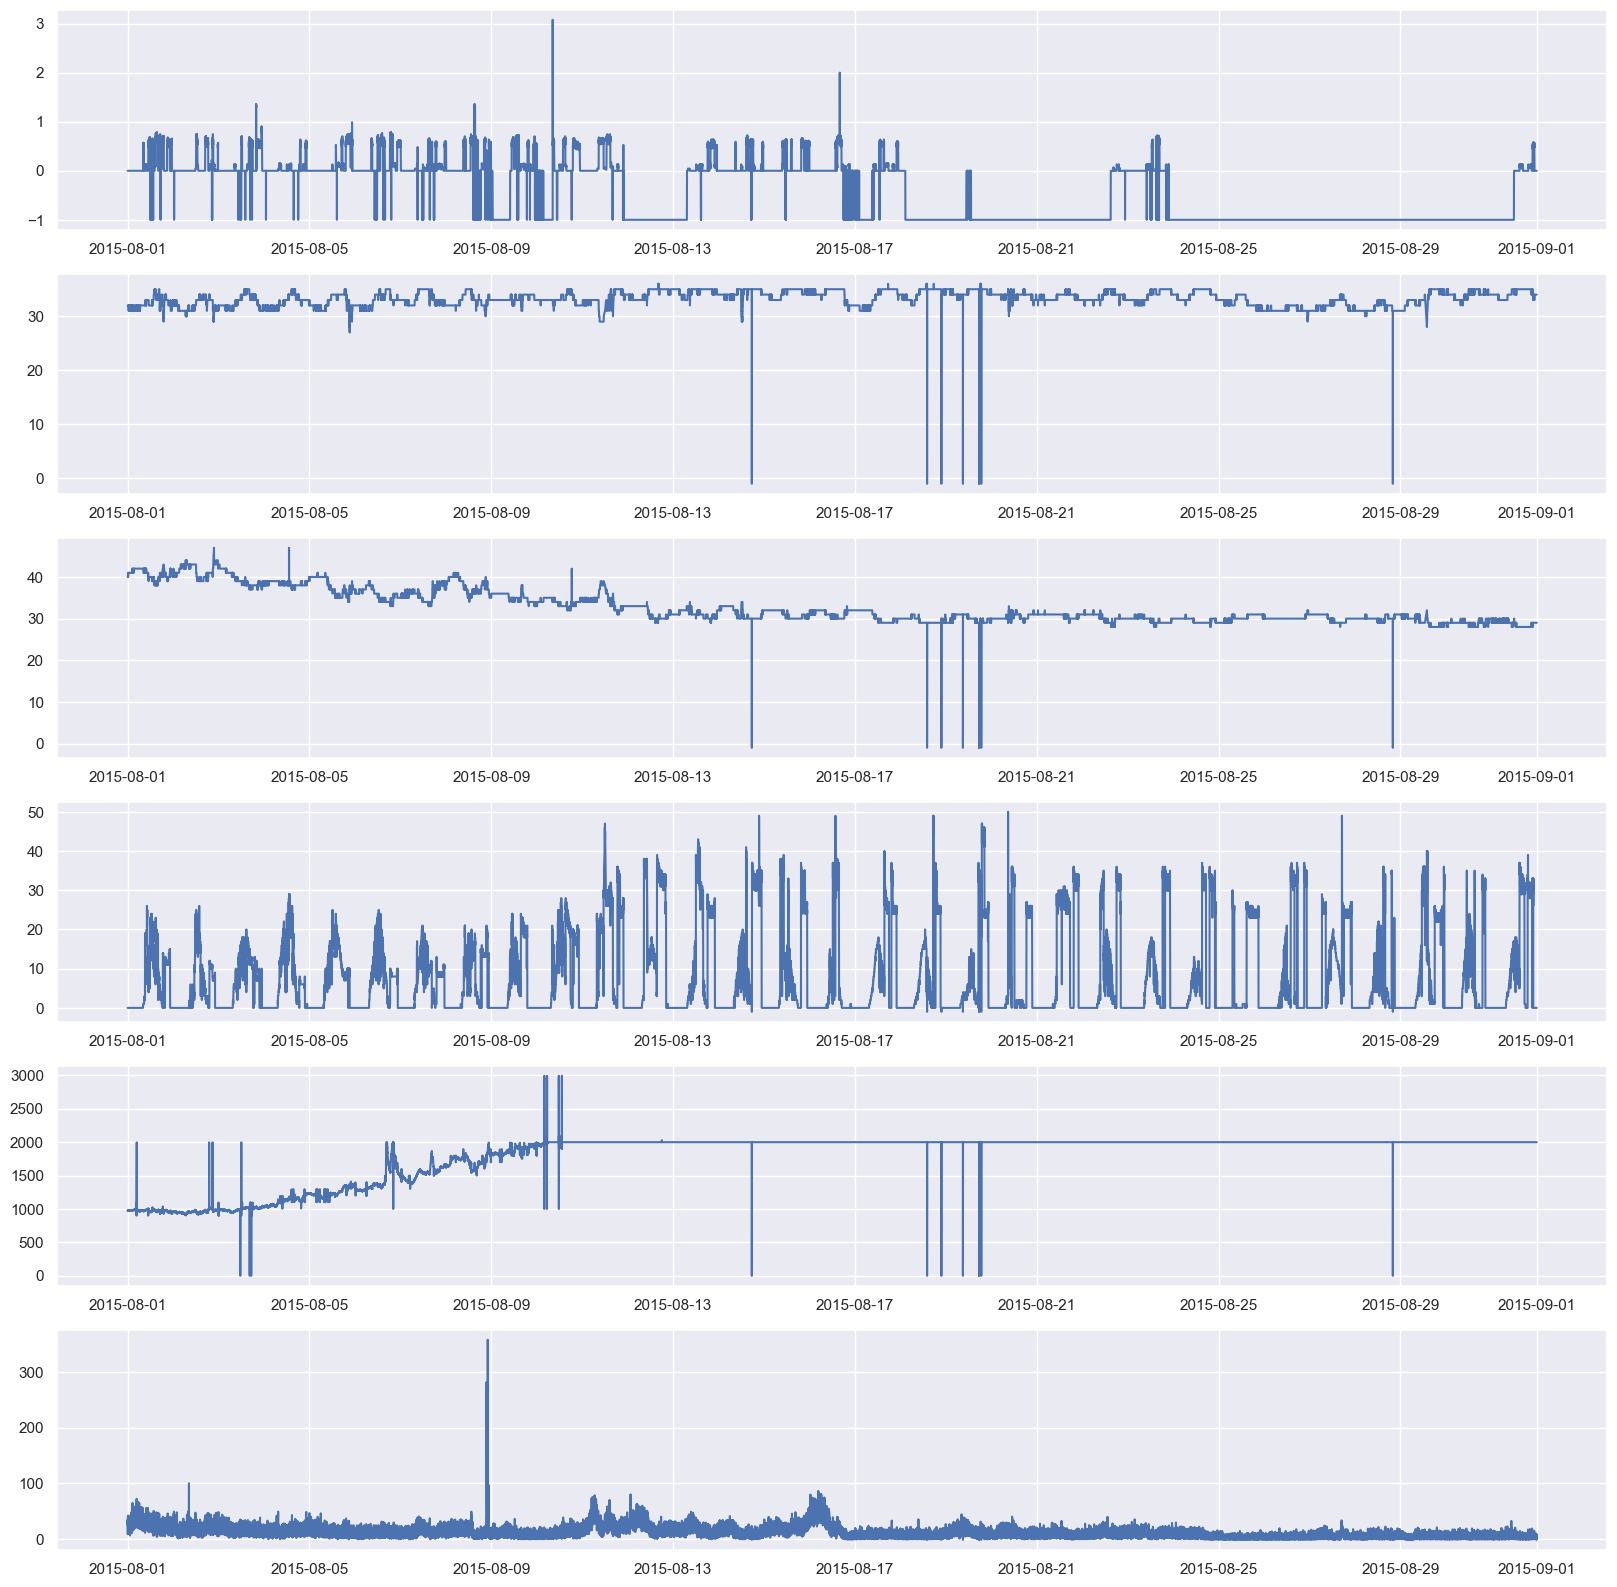

In [9]:
# Plotando os dados
sns.set_theme(style='darkgrid')

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=[20,20])

ax1.plot(sensor_data.index, sensor_data['power'])
ax2.plot(sensor_data.index, sensor_data['temp'])
ax3.plot(sensor_data.index, sensor_data['humidity'])
ax4.plot(sensor_data.index, sensor_data['light'])
ax5.plot(sensor_data.index, sensor_data['CO2'])
ax6.plot(sensor_data.index, sensor_data['dust'])

plt.show()

### <span style='color:purple'> Média móvel
</span>

In [11]:
sensor_data['dust'].head(10)

time
2015-08-01 00:00:28    27.80
2015-08-01 00:00:58    27.09
2015-08-01 00:01:28    34.50
2015-08-01 00:01:58    28.43
2015-08-01 00:02:28    27.58
2015-08-01 00:02:59    29.35
2015-08-01 00:03:29    26.46
2015-08-01 00:03:59    23.35
2015-08-01 00:04:29    11.67
2015-08-01 00:04:59     9.06
Name: dust, dtype: float64

**Aplicando a média móvel para suavizar o sinal dos sensores.**

Utilizando o `.rolling()` para o cálculo de janela móvel, seguido da operação (`mean`) desejada.

<span style='color:blue'> Média móvel 2

In [19]:
# Média móvel 2 para os dez primeiros valores 

sensor_data['dust'].head(10).rolling(2).mean()

time
2015-08-01 00:00:28       NaN
2015-08-01 00:00:58    27.445
2015-08-01 00:01:28    30.795
2015-08-01 00:01:58    31.465
2015-08-01 00:02:28    28.005
2015-08-01 00:02:59    28.465
2015-08-01 00:03:29    27.905
2015-08-01 00:03:59    24.905
2015-08-01 00:04:29    17.510
2015-08-01 00:04:59    10.365
Name: dust, dtype: float64

<span style='color:blue'> Média móvel 3

In [23]:
# Para os 10 primeiros valores do dataframe

sensor_data['dust'].head(10).rolling(3).mean()

time
2015-08-01 00:00:28          NaN
2015-08-01 00:00:58          NaN
2015-08-01 00:01:28    29.796667
2015-08-01 00:01:58    30.006667
2015-08-01 00:02:28    30.170000
2015-08-01 00:02:59    28.453333
2015-08-01 00:03:29    27.796667
2015-08-01 00:03:59    26.386667
2015-08-01 00:04:29    20.493333
2015-08-01 00:04:59    14.693333
Name: dust, dtype: float64

##### <span style='color:blue'> Alguns gráficos

<Axes: xlabel='time'>

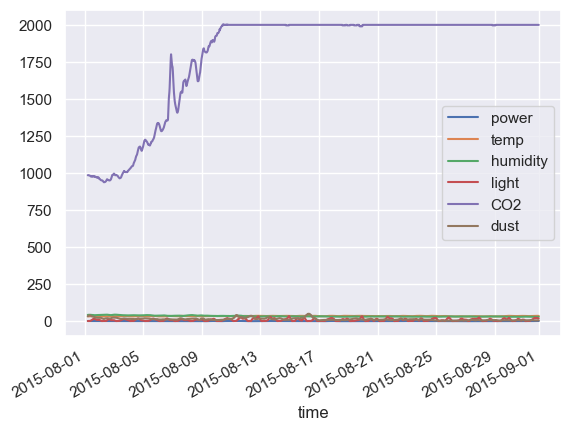

In [31]:
# Janela móvel de 600, aplicando a média

sensor_data.rolling(600).mean().plot()

<Axes: xlabel='time'>

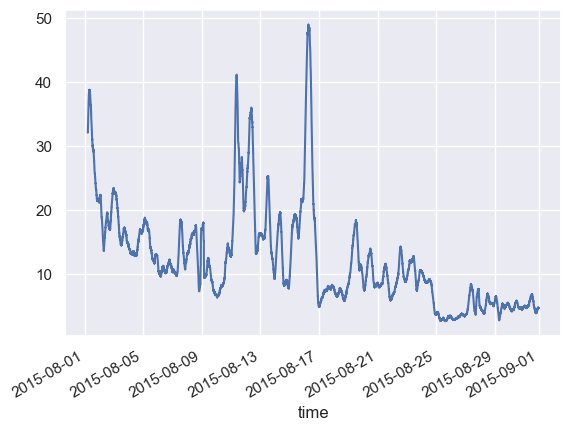

In [43]:
# Aplicando apenas a variável dust

sensor_data['dust'].rolling(600).mean().plot()

In [63]:
import os

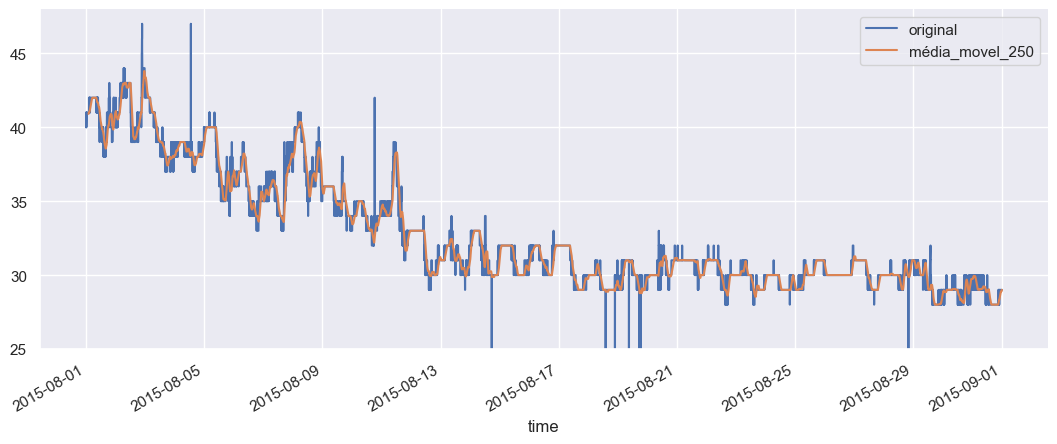

In [65]:
# Plot original e com média móvel

plt.figure(figsize=[13,5])

sensor_data.humidity.plot(label='original')
sensor_data.humidity.rolling(250).mean().plot(label='média_movel_250')

plt.legend()
plt.ylim(25, 48)
sns.despine()

# Salvando
os.makedirs('./img', exist_ok=True)
plt.savefig('./img/media_movel_dust.png', dpi=200)

**A média móvel é mais suave e não captura de forma tão agressiva os valores extremos.**

### <span style='color:purple'> Redução da amostra (Downsampling)

In [74]:
# Considerando os dados a cada minuto e não mais a 30 segundos

# Fazendo um resample()
# Realizando a agregação e já calculando a média
sensor_data.head(300).resample('60min').mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:00,0.0,31.554622,40.798319,0.0,975.504202,26.522521
2015-08-01 01:00:00,0.0,31.316667,41.000000,0.0,976.283333,25.788417
2015-08-01 02:00:00,0.0,31.475410,41.065574,0.0,979.868852,33.271639


In [76]:
# Realizando a agregação e já calculando a média

sensor_data.head(300).resample('1min').mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:00,0.0,32.0,40.0,0.0,973.0,27.445
2015-08-01 00:01:00,0.0,32.0,40.0,0.0,973.0,31.465
2015-08-01 00:02:00,0.0,32.0,40.0,0.0,972.0,28.465
2015-08-01 00:03:00,0.0,32.0,40.0,0.0,971.0,24.905
2015-08-01 00:04:00,0.0,32.0,40.0,0.0,974.0,10.365
...,...,...,...,...,...,...
2015-08-01 02:26:00,0.0,31.0,42.0,0.0,983.0,42.790
2015-08-01 02:27:00,0.0,32.0,41.5,0.0,983.0,34.905
2015-08-01 02:28:00,0.0,32.0,41.5,0.0,980.0,33.120


### <span style='color:purple'> Aumento da amostra (Upsampling)

In [82]:
# aplicando novamente o resample()

sensor_data.head(10).resample('10s').mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:40,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:10,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.0,34.50
2015-08-01 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:40,NaN,NaN,NaN,NaN,NaN,NaN


#### <span style='color:purple'> Usando `.bfill()` (backward fill)

Para preencher os valores ausentes com os valores posteriores.

In [86]:
sensor_data.head(10).resample('10s').bfill()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32,40,0,973,27.80
2015-08-01 00:00:30,0.0,32,40,0,973,27.09
2015-08-01 00:00:40,0.0,32,40,0,973,27.09
2015-08-01 00:00:50,0.0,32,40,0,973,27.09
2015-08-01 00:01:00,0.0,32,40,0,973,34.50
2015-08-01 00:01:10,0.0,32,40,0,973,34.50
2015-08-01 00:01:20,0.0,32,40,0,973,34.50
2015-08-01 00:01:30,0.0,32,40,0,973,28.43
2015-08-01 00:01:40,0.0,32,40,0,973,28.43


#### <span style='color:purple'> Usando `.ffill()` (forward fill)

Para preencher os valores ausentes com os valores anteriores.

In [90]:
sensor_data.head(10).resample('10s').ffill()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:30,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:40,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:01:00,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:10,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:30,0.0,32.0,40.0,0.0,973.0,34.50
2015-08-01 00:01:40,0.0,32.0,40.0,0.0,973.0,34.50


In [97]:
sensor_data.head(10).resample('10s').bfill(limit=1).interpolate()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32.0,40.0,0.0,973.000000,27.800000
2015-08-01 00:00:30,0.0,32.0,40.0,0.0,973.000000,27.563333
2015-08-01 00:00:40,0.0,32.0,40.0,0.0,973.000000,27.326667
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.000000,27.090000
2015-08-01 00:01:00,0.0,32.0,40.0,0.0,973.000000,29.560000
2015-08-01 00:01:10,0.0,32.0,40.0,0.0,973.000000,32.030000
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.000000,34.500000
2015-08-01 00:01:30,0.0,32.0,40.0,0.0,973.000000,32.476667
2015-08-01 00:01:40,0.0,32.0,40.0,0.0,973.000000,30.453333


#### <span style='color:purple'> Shift nos dados

Útil para comparar dados de momentos diferentes (como cotação de ações em momentos diferentes, por exemplo)

In [104]:
sensor_data['dust_1'] = sensor_data.dust.shift(+1)
sensor_data.head(3)

,power,temp,humidity,light,CO2,dust,dust_1
time,,,,,,,
2015-08-01 00:00:28,0.0,32,40,0,973,27.80,NaN
2015-08-01 00:00:58,0.0,32,40,0,973,27.09,27.80
2015-08-01 00:01:28,0.0,32,40,0,973,34.50,27.09


In [106]:
sensor_data[['dust', 'dust_1']]

,dust,dust_1
time,,
2015-08-01 00:00:28,27.80,NaN
2015-08-01 00:00:58,27.09,27.80
2015-08-01 00:01:28,34.50,27.09
2015-08-01 00:01:58,28.43,34.50
2015-08-01 00:02:28,27.58,28.43
...,...,...
2015-08-31 23:57:40,0.00,4.72
2015-08-31 23:58:10,2.61,0.00
2015-08-31 23:58:40,3.38,2.61


In [112]:
# A correlação dos dados
sensor_data[['dust', 'dust_1']].corr()

,dust,dust_1
dust,1.000000,0.813324
dust_1,0.813324,1.000000


In [114]:
sensor_data[['dust', 'dust_1']].head(15).corr()

,dust,dust_1
dust,1.000000,0.704252
dust_1,0.704252,1.000000
